In [2]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
import os 
a = os.listdir('2016band345') #2016 images
b =os.listdir('2019band345')  #2019 images
print(a,b)

['b3.TIF', 'b4.TIF', 'b5.TIF'] ['b3.TIF', 'b4.TIF', 'b5.TIF']


In [46]:
#open 2016 band images
band3 = rasterio.open('2016band345/b3.tif') #nir
band4 = rasterio.open('2016band345/b4.tif') #red
band5 = rasterio.open('2016band345/b5.tif') #nir
#open 2019 band images
ban3 = rasterio.open('2019band345/b3.tif') #nir
ban4 = rasterio.open('2019band345/b4.tif') #red
ban5 = rasterio.open('2019band345/b5.tif') #nir


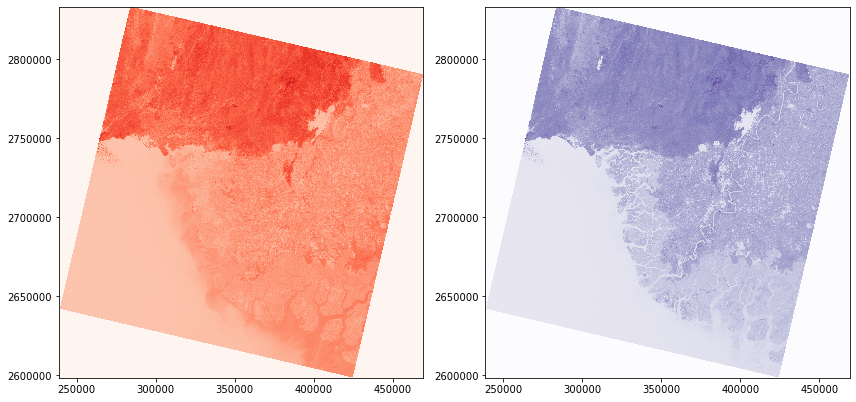

In [47]:
#multiple band representation 2016 red and nir
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap = 'Reds') #red
plot.show(band5, ax=ax2, cmap = 'Purples') #nir
fig.tight_layout()

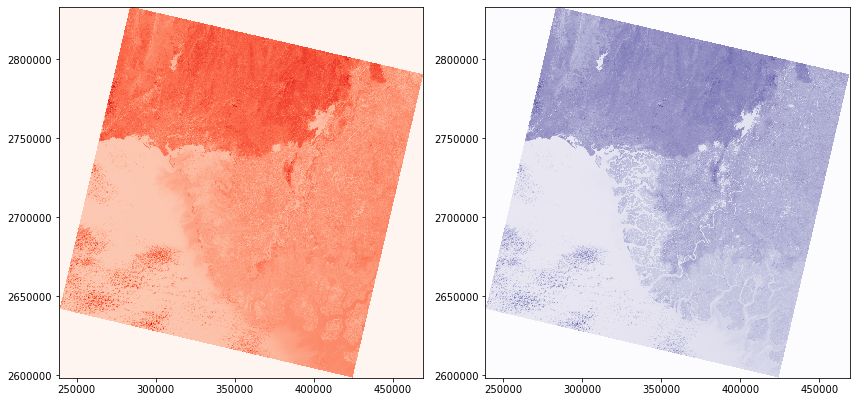

In [48]:
#multiple band representation 2019 red and nir
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(ban4, ax=ax1, cmap = 'Reds') #red
plot.show(ban5, ax=ax2, cmap = 'Purples') #nir
fig.tight_layout()

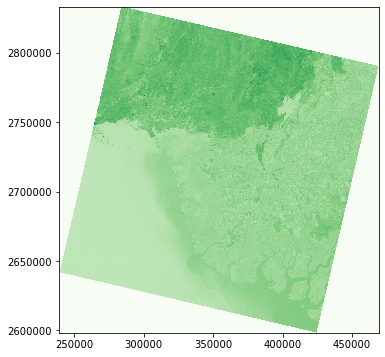

In [49]:
#multiple band representation 2016 green
fig, (ax3) = plt.subplots(1, figsize=(12, 6))
plot.show(band3, ax=ax3, cmap = 'Greens') #Greens

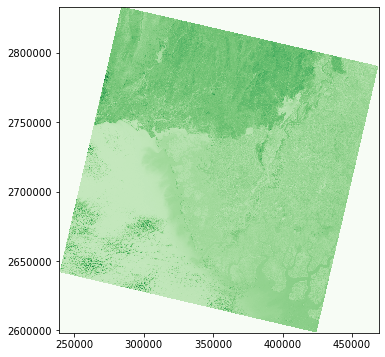

In [50]:
#multiple band representation 2013 green
fig, (ax3) = plt.subplots(1, figsize=(12, 6))
plot.show(ban3, ax=ax3, cmap = 'Greens') #Greens

In [20]:
band4.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [51]:
band4.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [52]:
#generate nir and red objects as arrays in float format 2016
green = band3.read(1).astype('float')
red = band4.read(1).astype('float')
nir = band5.read(1).astype('float')
#generate nir and red objects as arrays in float format 2019
gr = ban3.read(1).astype('float')
re = ban4.read(1).astype('float')
ni = ban5.read(1).astype('float')


In [58]:
red, re

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [59]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [66]:
#ndvi calculation 2016, empty cells or nodata cells are reported as 0
ndvi2016=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [67]:
#ndvi calculation 2019, empty cells or nodata cells are reported as 0
ndvi2019=np.where(
    (ni+re)==0., 
    0, 
    (ni-re)/(ni+re))
ndvi[:5,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [68]:
#ndwi calculation 2016, empty cells or nodata cells are reported as 0
ndwi2016=np.where(
    (green+nir)==0., 
    0, 
    (green-nir)/(green+nir))
ndvi[:5,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [69]:
#ndwi calculation 2019, empty cells or nodata cells are reported as 0
ndwi2019=np.where(
    (gr+ni)==0., 
    0, 
    (gr-ni)/(gr+ni))
ndvi[:5,:5]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [70]:
#ndvi, ndwi mean and standard deviation, 2016
ndvimean = ndvi2016.mean()
ndvistd = ndvi2016.std()
ndwimean = ndwi2016.mean()
ndwistd = ndwi2016.std()

print('ndvi mean', ndvimean)
print('ndvi std', ndvistd)
print('ndwi mean', ndwimean)
print('ndwi std', ndwistd)


ndvi mean 0.02477090279993475
ndvi std 0.08475824849246275
ndwi mean -0.02749784987137417
ndwi std 0.11237566330960311


In [71]:
#ndvi, ndwi mean and standard deviation, 2019
ndvimean = ndvi2019.mean()
ndvistd = ndvi2019.std()
ndwimean = ndwi2019.mean()
ndwistd = ndwi2019.std()

print('ndvi mean', ndvimean)
print('ndvi std', ndvistd)
print('ndwi mean', ndwimean)
print('ndwi std', ndwistd)

ndvi mean 0.026900271657310324
ndvi std 0.08184793181687404
ndwi mean -0.03115493552726919
ndwi std 0.10818680386331528


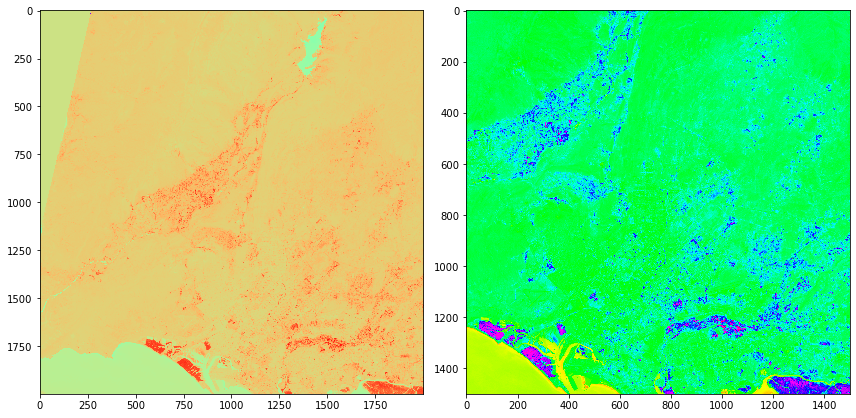

In [73]:
ndvi_sub_2016 = ndvi2016[1000:3000, 1000:3000]

ndvi_sub2_2016 = ndvi2016[1500:3000, 1500:3000]
# Plot 2016 ndvi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(ndvi_sub_2016, ax=ax1, cmap = 'rainbow') 
plot.show(ndvi_sub2_2016, ax=ax2, cmap = 'hsv')
fig.tight_layout()
plt.show()

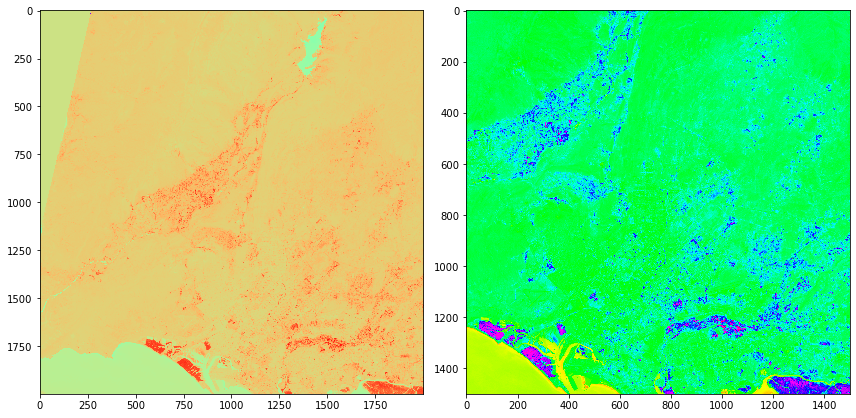

In [76]:
ndvi_sub_2019 = ndvi2016[1000:3000, 1000:3000]

ndvi_sub2_2019 = ndvi2016[1500:3000, 1500:3000]
# Plot 2019 ndvi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(ndvi_sub_2019, ax=ax1, cmap = 'rainbow') 
plot.show(ndvi_sub2_2019, ax=ax2, cmap = 'hsv')
fig.tight_layout()
plt.show()

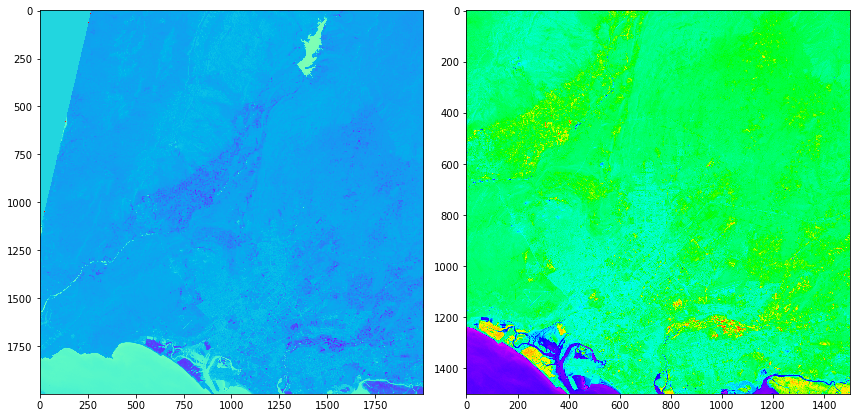

In [77]:
ndwi_sub_2016 = ndwi2016[1000:3000, 1000:3000]

ndwi_sub2_2016 = ndwi2016[1500:3000, 1500:3000]
# Plot 2016 ndwi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(ndwi_sub_2016, ax=ax1, cmap = 'rainbow') 
plot.show(ndwi_sub2_2016, ax=ax2, cmap = 'hsv')
fig.tight_layout()
plt.show()

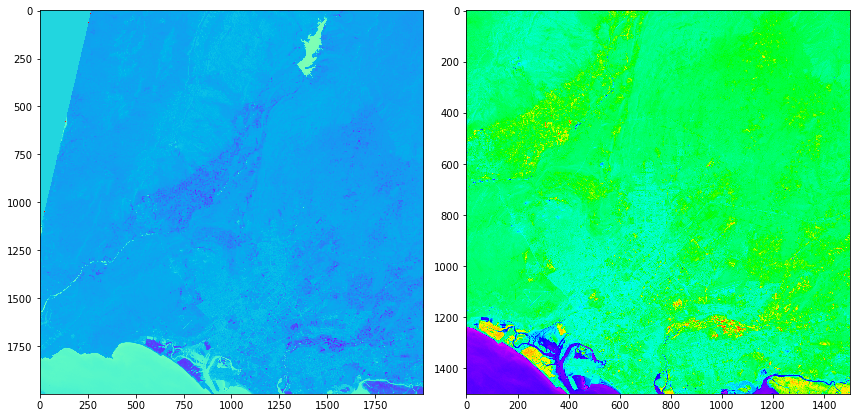

In [78]:
ndwi_sub_2019 = ndwi2016[1000:3000, 1000:3000]

ndwi_sub2_2019 = ndwi2016[1500:3000, 1500:3000]
# Plot 2019 ndwi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(ndwi_sub_2019, ax=ax1, cmap = 'rainbow') 
plot.show(ndwi_sub2_2019, ax=ax2, cmap = 'hsv')
fig.tight_layout()
plt.show()

In [79]:
#export ndvi image 2016
ndviImage = rasterio.open('ndvi2016.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi2016,1)
ndviImage.close()

In [82]:
#export ndvi image 2019
ndviImage = rasterio.open('ndvi2019.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi2019,1)
ndviImage.close()

In [83]:
#export ndwi image 2016
ndwiImage = rasterio.open('ndwi2016.tiff','w',driver='Gtiff',
                          width=band3.width, 
                          height = band3.height, 
                          count=1, crs=band3.crs, 
                          transform=band3.transform, 
                          dtype='float64')
ndwiImage.write(ndwi2016,1)
ndwiImage.close()

In [84]:
#export ndwi image 2019
ndwiImage = rasterio.open('ndwi2019.tiff','w',driver='Gtiff',
                          width=band3.width, 
                          height = band3.height, 
                          count=1, crs=band3.crs, 
                          transform=band3.transform, 
                          dtype='float64')
ndwiImage.write(ndwi2019,1)
ndwiImage.close()

In [85]:
for i in [band3,band4,band5,ban3,band4,ban5, ndvi2016, ndwi2016, ndvi2019, ndwi2019]:
    print (i.shape)

(7831, 7681)
(7831, 7681)
(7831, 7681)
(7831, 7681)
(7831, 7681)
(7831, 7681)
(7831, 7681)
(7831, 7681)
(7831, 7681)
(7831, 7681)
